In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [8]:
G = 9.81

In [9]:
# def visualize_projectile_trajectory(v0, angle, m, h):
#     """
#     Visualize the trajectory of a projectile launched from a trebuchet.

#     Parameters:
#         v0: Начальная скорость вылета снаряда.
#         angle: Угол вылета снаряда.
#         m: Масса снаряда.
#         h: Высота вылета снаряда.
#     """
#     # Convert angle to radians
#     theta = np.radians(angle)

#     # Time of flight calculation
#     #t_flight = (v0 * np.sin(theta) + np.sqrt((v0 * np.sin(theta))**2 + 2 * G * h)) / G

#     delta_t = (2*v0*np.sin(theta))/G
#     x1 = delta_t*v0*np.cos(theta)

#     D = (2*v0*np.sin(theta))**2 + 8*G*(h)
#     t_flight = (-2*v0*np.sin(theta) + np.sqrt(D))/(2*G)
#     print('время полёта:', t_flight)
    
#     x2 = speed*np.cos(a2r)*t1

#     # Time array for plotting
#     t = np.linspace(0, t_flight, num=500)

#     # Trajectory equations
#     x = v0 * np.cos(theta) * t
#     print('x:', x[-1])
#     y = h + v0 * np.sin(theta) * t - 0.5 * G * t**2

#     # Plotting the trajectory
#     plt.figure(figsize=(10, 6))
#     plt.plot(x, y, label=f'Траектория (v0={v0} м/с, угол вылета={angle}°, высота вылета={h} m)')
#     plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Ground level
#     plt.xlabel('Дистанция (m)')
#     plt.ylabel('Высота (m)')
#     plt.title('Траектория полёта снаряда')
#     plt.legend()
#     plt.grid()
#     plt.show()

In [181]:
def calculate_r(m1, m2, ma, h, l, a1, a2, is_shift=False, visualize=False):
    '''
    m1 - mass of projectile \n
    m2 - mass of counterweight \n
    h - height of mount \n
    l - length of lever \n
    a1 - start angle \n
    a2 - finish angle (Measured in the opposite direction from the starting point) \n
    shift - difference between middle of trebushet and position of throw \n
    ma - mass of lever \n
    '''
    
    a1r = np.radians(a1)
    a2r = np.radians(a2)

    #speed = np.sqrt((2*G*l*(np.cos(a1r) + np.cos(a2r))*(m2-m1))/(m2+m1+(ma/3)))

#----------------------------------------------------------------------------------------------
    # epsilon = ((12*G*(m2-m1))/(l*(ma+3*m1+3*m2)))
    # acceleration = epsilon * l
    # print(epsilon, acceleration)
    # time = np.sqrt((2*(np.radians(180)-a1r-a2r))/(epsilon))
    # print(time)

    # speed_new = np.sqrt(acceleration * time)
    # print('speed_new:', speed_new)

    # I_1 = m1*(l**2) + (ma*(l**2))/3
    # I_2 = m2*(l**2) + (ma*(l**2))/3

    # M_1 = m1 * G * l
    # M_2 = m2 * G * l

    # eps_1 = M_1 / I_1
    # eps_2 = M_2 / I_2

    # print(M_1, M_2, I_1, I_2, eps_1, eps_2)

    # eps = eps_2 - eps_1
    # #print(f'ускорение m1: {eps_1}, m2: {eps_2}')
    # acceleration = eps * l
    #print('ускорение:', eps, acceleration)

    # time = np.sqrt((2*(np.radians(180-a2-a1)))/(eps))
    # #print('время ускорения', time)

    # speed = acceleration * time
#----------------------------------------------------------------------------------------------
    #I = (m1 * l**2)/4 + (m2 * l**2)/4 + (ma * l**2)/12
    # I = m2*l**2 + m1*l**2 + (4*ma*l**2)/3
    # M = (m2*G*l)# - (m1*G*l)
    # eps = M/I
    #w = np.sqrt(2 * eps * np.radians(180 - a1 - a2))
    # t = np.sqrt((2*(np.radians(180-a1-a2)))/(eps))
    #speed = w * l
    # speed = t * (eps * l)
#----------------------------------------------------------------------------------------------
    speed = np.sqrt((2*G*(l*(np.cos(a1r)+np.cos(a2r)))*(m2-m1))/(m1+m2))
#----------------------------------------------------------------------------------------------

    print('Скорость вылета:', speed)
    print('высота:', h + l*np.cos(a2r))
    
    t1 = (2*speed*np.sin(a2r))/G
    x1 = t1*speed*np.cos(a2r)
    
    heigth_of_launch = h + l*np.cos(a2r)
    D = (2*speed*np.sin(a2r))**2 + 8*G*(heigth_of_launch)
    t2 = (-2*speed*np.sin(a2r) + np.sqrt(D))/(2*G)    
    x2 = speed*np.cos(a2r)*t2
    
    print('Время полёта:', t1+t2)
    
    length = x1+x2
    if is_shift:
        shift = l * np.sin(a2r)
        length -= shift
    else:
        shift = 0
    print(f'Дистанция (m1={m1}, m2={m2}) = {length*100:.1f}cm')

    if visualize:
        t1_arr = np.linspace(0, t1+t2, num=10000, endpoint=False)
        x1_arr = speed*np.cos(a2r)*t1_arr - shift
        y1_arr = speed*np.sin(a2r)*t1_arr - 1/2*G*(t1_arr**2) + heigth_of_launch
        plt.figure(figsize=(12,8))
        plt.plot(x1_arr, y1_arr, color='blue', label='Траектория полета')
        plt.scatter(x1_arr[np.where(y1_arr == np.max(y1_arr))][0], np.max(y1_arr), color='red', s=25, zorder=10, label=f'Максимальный Y={np.max(y1_arr):.3f} м (X={x1_arr[np.where(y1_arr == np.max(y1_arr))][0]:.3f})')
        plt.scatter(x1_arr[-1], 0, color='green', s=25, zorder=10, label=f'Максимальный X={x1_arr[-1]:.3f} м')

        plt.plot([0, 0], [0, h], label='Станина', color="black")

        plt.plot([-l*np.sin(a2r), 0], [h+l*np.cos(a2r), h], label='Метательный рычаг (момент вылета)', color='red')
        plt.plot([0, l*np.sin(a2r)], [h, h-l*np.cos(a2r)], label='Рычаг противовеса (момент вылета)', color='green')

        plt.plot([-l*np.sin(a1r), 0], [h-l*np.cos(a1r), h], label='Метательный рычаг (начальный момент)', color='red', linestyle='--', alpha=0.8)
        plt.plot([0, l*np.sin(a1r)], [h, h+l*np.cos(a1r)], label='Рычаг противовеса (начальный момент)', color='green', linestyle='--', alpha=0.8)

        plt.plot(0, h, marker='o', color='black')
        plt.plot(-l*np.sin(a2r), h+l*np.cos(a2r), marker='o', zorder=10, color='red')
        plt.plot(l*np.sin(a2r), h-l*np.cos(a2r), marker='o', zorder=10, color='green')
        plt.plot(-l*np.sin(a1r), h-l*np.cos(a1r), marker='o', zorder=10, color='red', alpha=0.8)
        plt.plot(l*np.sin(a1r), h+l*np.cos(a1r), marker='o', zorder=10, color='green', alpha=0.8)

        pre_release_t = np.linspace(np.radians(270-a1), np.radians(90+a2), num=1000)
        pre_release_x = np.cos(pre_release_t) * l
        pre_release_y = h + np.sin(pre_release_t) * l
        plt.plot(pre_release_x, pre_release_y, label='Траектория до вылета', color='blue', linestyle='--', alpha=0.8)

        plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
        plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
        plt.xlabel('Дистанция (м)')
        plt.ylabel('Высота (м)')
        plt.legend(loc='upper right')
        plt.grid()
        plt.axis('equal')
        plt.show()

    return length

In [182]:
# Веса в КГ
ball = 0.0168
jump_ball = 0.0111
fixing = 0.009 + 0.0025 + 0.0025 * 2 #= 0.0165
backet = [0.010, 0.027, 0.043, 0.060, 0.077]
lever_mass = 0.019
frame_mass = 0.066

# Длины в метрах
lever_length = 0.125
frame_heigth = 0.151
bruss_heigth = 0.015

# Углы в градусах
alpha = 33
beta = 35

# Сдвиг
shift = lever_length * np.sin(np.radians(beta))
print(shift)

0.07169705454388076


In [183]:
backet[3] + fixing

0.0765

Скорость вылета: 1.7422495403007916
высота: 0.26839400553612397
Время полёта: 0.3570045956711628
Дистанция (m1=0.0111, m2=0.0765) = 43.8cm


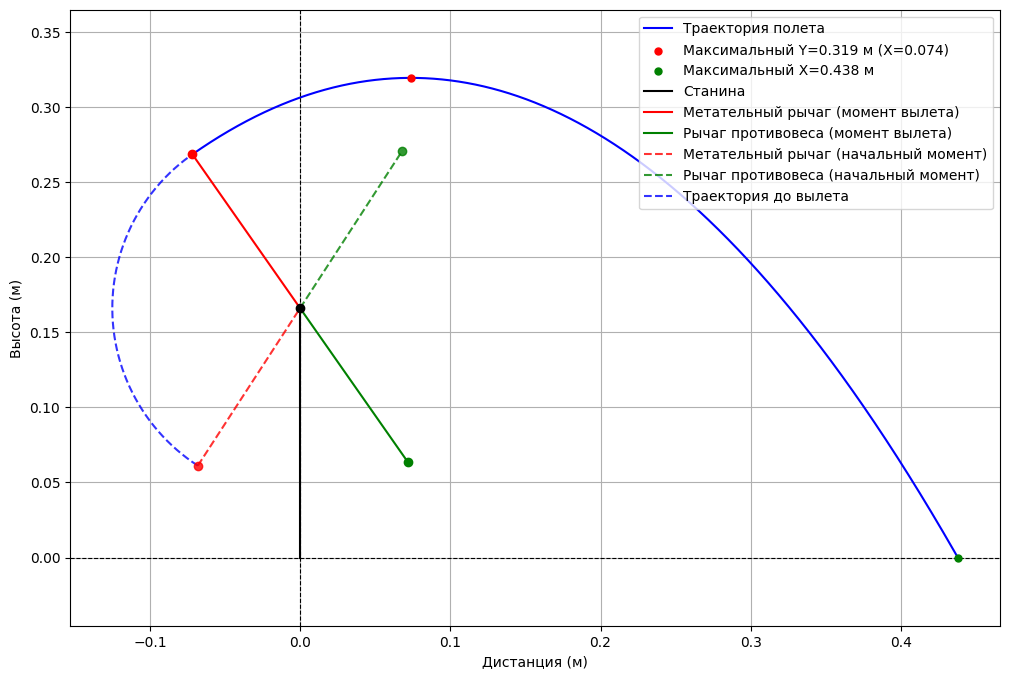

In [184]:
distance = calculate_r(jump_ball, backet[3] + fixing, lever_mass, frame_heigth + bruss_heigth, lever_length, alpha, beta, is_shift=True, visualize=True)

In [164]:
distance = calculate_r(jump_ball, backet[4] + fixing, lever_mass, frame_heigth + bruss_heigth, lever_length, alpha, beta, is_shift=True)

Скорость вылета: 1.857366971896724
Время полёта: 0.3664965162802189
Дистанция (m1=0.0111, m2=0.0935) = 48.6cm


In [165]:
distance = calculate_r(jump_ball, backet[3] + fixing, lever_mass, frame_heigth + bruss_heigth, lever_length, alpha, beta, is_shift=True)

Скорость вылета: 1.8020707903133661
Время полёта: 0.36191878238680475
Дистанция (m1=0.0111, m2=0.0765) = 46.3cm


In [166]:
distance = calculate_r(jump_ball, backet[2] + fixing, lever_mass, frame_heigth + bruss_heigth, lever_length, alpha, beta, is_shift=True)

Скорость вылета: 1.724351974142633
Время полёта: 0.3555421523829567
Дистанция (m1=0.0111, m2=0.0595) = 43.1cm


In [167]:
distance = calculate_r(jump_ball, backet[1] + fixing, lever_mass, frame_heigth + bruss_heigth, lever_length, alpha, beta, is_shift=True)

Скорость вылета: 1.615224411386929
Время полёта: 0.3467042313646611
Дистанция (m1=0.0111, m2=0.0435) = 38.7cm


In [168]:
distance = calculate_r(jump_ball, backet[0] + fixing, lever_mass, frame_heigth + bruss_heigth, lever_length, alpha, beta, is_shift=True)

Скорость вылета: 1.4208059674783917
Время полёта: 0.3313051828429411
Дистанция (m1=0.0111, m2=0.026500000000000003) = 31.4cm


In [169]:
distance = calculate_r(jump_ball, 0.0112, lever_mass, frame_heigth + bruss_heigth, lever_length, alpha, beta, is_shift=True)

Скорость вылета: 1.061709558883918
Время полёта: 0.3040930552015392
Дистанция (m1=0.0111, m2=0.0112) = 19.3cm


In [170]:
print(fixing)
print(backet)
print(np.array(backet) + fixing)

0.0165
[0.01, 0.027, 0.043, 0.06, 0.077]
[0.0265 0.0435 0.0595 0.0765 0.0935]
